In [3]:
from manim import *
import numpy as np

class ConeOnHemisphere(ThreeDScene):
    def construct(self):
        # --- Configuration ---
        r = 2.0  # Radius
        # To satisfy the condition that the center is at z=+radius 
        # AND the base touches the hemisphere at z=0, 
        # the height must be 2 * radius.
        h = 2 * r 
        
        self.set_camera_orientation(phi=75 * DEGREES, theta=30 * DEGREES)

        # --- 1. The Lower Hemisphere ---
        # Parametric surface for x, y, z.
        # v ranges from PI/2 to PI (bottom half of sphere, z <= 0)
        hemisphere = Surface(
            lambda u, v: np.array([
                r * np.cos(u) * np.sin(v),
                r * np.sin(u) * np.sin(v),
                r * np.cos(v)
            ]),
            u_range=[0, TAU],
            v_range=[PI / 2, PI],
            checkerboard_colors=[BLUE_D, BLUE_E],
            resolution=(32, 32)
        )

        # --- 2. The Cone ---
        cone = Cone(
            base_radius=r,
            height=h,
            direction=OUT,  # 'OUT' is the Z-axis [0,0,1], pointing strictly Up in 3D
            checkerboard_colors=[RED_D, RED_E]
        )
        
        # --- 3. Positioning ---
        # We explicitly set the center of the cone to x=0, y=0, z=radius
        cone.move_to(np.array([0, 0, r]))

        # --- 4. Render and Animate ---
        full_shape = VGroup(hemisphere, cone)
        self.add(full_shape)

        # Rotate the camera to show the alignment
        self.begin_ambient_camera_rotation(rate=0.5)
        self.wait(6)

%manim -ql -v warning ConeOnHemisphere

Manim Community v0.19.1

Manim Community v0.19.1

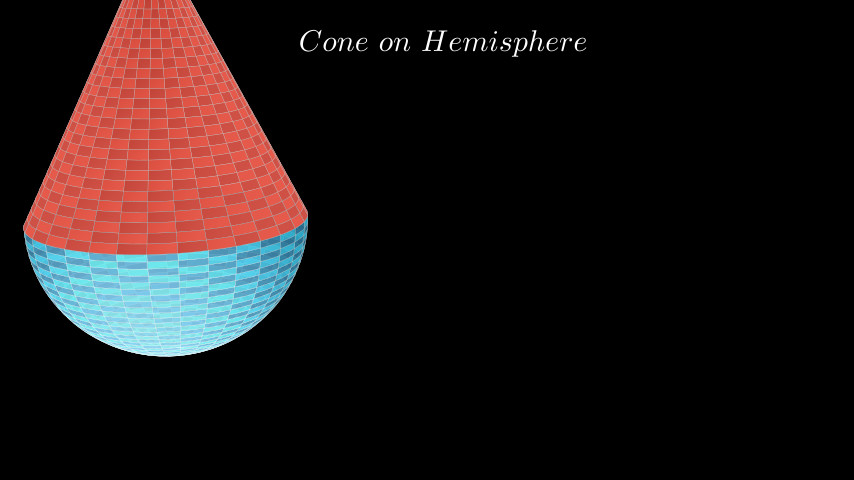

In [231]:
from manim import *
import numpy as np

class ConeHemisphereFinal(ThreeDScene):
    def construct(self):

        label = MathTex(r"Cone\ on\ Hemisphere")

        RADIUS_OF_CONE = 2.0
        HEIGHT_OF_CONE = 4.0
        RADIUD_OF_HEMISPHERE = 2.0
        CENTER = np.array([4, -2, 0])

        label.scale(0.7).font_size = 48
        label.to_corner(UP + 10*LEFT)
        self.add_fixed_in_frame_mobjects(label)


        hemisphere = Surface(
            lambda u, v: np.array([
                RADIUD_OF_HEMISPHERE * np.cos(u) * np.sin(v),
                RADIUD_OF_HEMISPHERE * np.sin(u) * np.sin(v),
                RADIUD_OF_HEMISPHERE * np.cos(v)
            ]),
            u_range=[0, TAU],
            v_range=[PI / 2, PI],
            checkerboard_colors=[BLUE_D, BLUE_E],
            resolution=(32, 32),
        ).move_to(CENTER).set_opacity(0.8)

        center = Dot3D(point=CENTER, color=YELLOW, radius=0.1)
        center.shift([0, 0, RADIUD_OF_HEMISPHERE - 1 ])

        line = Line3D(
            start=center.get_center(),
            end=center.get_center() + np.array([RADIUD_OF_HEMISPHERE, RADIUD_OF_HEMISPHERE, 0]),
            color=RED
        )

        cone = Cone(
            base_radius=RADIUS_OF_CONE,
            height=HEIGHT_OF_CONE,
            direction=OUT,
            checkerboard_colors=[RED_D, RED_E],
        ).move_to(CENTER + np.array([0, 0, RADIUD_OF_HEMISPHERE + 1 ]))

        self.add(hemisphere, cone)

        # arrow = Arrow3D(
        #     start=line.get_start(),
        #     end=line.get_end(),
        #     color=RED
        # )
        # self.add(arrow, line, center)

        

        self.set_camera_orientation(phi=75 * DEGREES, theta=30 * DEGREES)

%manim -ql -v warning ConeHemisphereFinal